In [21]:
from fileHandler import csvHandler,jsonHandler
import pandas as pd

jh_ = jsonHandler('kode_negara_lengkap.json')
dfJ = jh_.dataFrame
negara = 'Australia'
kode_negara = dfJ[dfJ['name']==negara]['alpha-3'].tolist()[0] 

ch_ = csvHandler('produksi_minyak_mentah.csv')
df = ch_.dataFrame

N = kode_negara

tahun = df[df['kode_negara']==N]['tahun'].tolist()
produksi = df[df['kode_negara']==N]['produksi'].tolist()

# Summary : df -> df (kode negaranya cuma AUS) 
# -> tahun dan produksi aja -> diubah ke list

dic = {'tahun':tahun,'produksi':produksi}
df_ = pd.DataFrame(dic)


<module 'matplotlib.pyplot' from 'c:\\users\\piere\\appdata\\local\\programs\\python\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

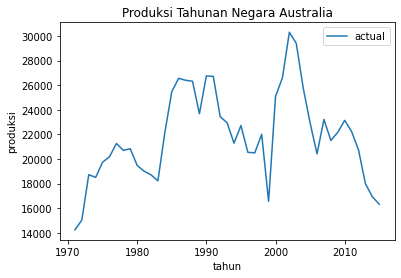

In [24]:
import matplotlib.pyplot as plt

plt.title('Produksi Tahunan Negara {}'.format(negara))
plt.plot(tahun,produksi,label='actual')
plt.xlabel('tahun')
plt.ylabel('produksi')
plt.legend()
plt